<a href="https://colab.research.google.com/github/ajay-del-bot/PythonAnalysis/blob/main/UP_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re 
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix


from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import webbrowser
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.downloader.download('vader_lexicon')
nltk.download('wordnet')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

In [15]:
from textblob import TextBlob
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

In [16]:
def dataCleaning(text):
        
        TEXT = (text.
    		replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")")

                 )
        tweet = TEXT.lower()

        # Replaces URLs with the ''
        tweet = re.sub(r'((www\.[\S]+)|(https?:\\)|(http\S+))', '', tweet)
        # tweet = re.sub(r'\\xe2\\x80\\x9.',r'', tweet)
        # tweet = re.sub(r'\xe2\x99\x88', r'', tweet)
        # tweet = re.sub(r'\.',r' ', tweet)  
        
        #Replace @handle with the word ''
        tweet = re.sub(r'@[\S]+', '', tweet)
        # # Replaces #hashtag with hashtag
        tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
        # # Remove RT (retweet)
        tweet = re.sub(r'\brt\b', '', tweet)
        # # Replace 2+ dots with space
        tweet = re.sub(r'\.{2,}', ' ', tweet)
        # # Replace ,  with space
        tweet = re.sub(r'\,', ' ', tweet)
        # # Strip space, " and ' from tweet
        tweet = tweet.strip(' "\'')
        # # Replace multiple spaces with a single space
        tweet = re.sub(r'\s+', ' ', tweet)
        
        tweet = re.sub(r'&amp;', 'and', tweet)
        tweet = re.sub(r'\\n', ' ', tweet)
        
        tweet =[lemmatizer.lemmatize(word) for word in tweet.split() if word not in stopwords.words('english')]
        tweet = ' '.join(tweet)
        return tweet

In [6]:
from zipfile import ZipFile
file_name = '/content/1Jan_to_5Jan.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

file_name = '/content/6Jan_to_10Jan.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

file_name = '/content/11Jan_to_15Jan.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [17]:
df_test = pd.read_csv('1Jan_to_5Jan/UP-SP.csv')
df_test

,Datetime,Text,User
0,2022-01-04 17:30:00+00:00,#WebQoof | A 2018 ABP News bulletin of a BJP ...,QuintFactCheck
1,2022-01-04 13:28:37+00:00,UP Assembly Election: After Shri Krishna in UP...,NewsNCR2
2,2022-01-04 13:05:57+00:00,"@joonmohit 2022 will be worse than 2021 , 2020...",sahil_kr_
3,2022-01-04 12:31:16+00:00,@ajitdatta Think this governor wants to fight ...,radheshkrish
4,2022-01-04 10:43:33+00:00,Diatribe between sp and bjp revolves around R...,rkprayag
...,...,...,...
1424,2022-01-02 10:42:02+00:00,#ReporterDiary -:\n\nSP TAKES SHELTER IN LORD ...,thefirstindia
1425,2022-01-02 07:41:59+00:00,BSP slams Akhilesh Yadav's poll promises in UP...,republic
1426,2022-01-04 03:52:29+00:00,Uttar Pradesh News\n\nJayant Chaudhary is repo...,NewsArenaIndia
1427,2022-01-03 08:39:30+00:00,Uttar Pradesh News\n\nSP &amp; RLD workers eng...,NewsArenaIndia


In [18]:
df_test2 = pd.read_csv('6Jan_to_10Jan/UP-SP.csv')
df_test2

,Datetime,Text,User
0,2022-01-09 21:45:36+00:00,SP not even getting the seat as many steps as ...,RajeshP21532037
1,2022-01-09 18:28:46+00:00,"UP election mein SP, BSP ka haal us student ja...",Prachi_Ras
2,2022-01-09 18:08:51+00:00,UP Election: OP Rajbhar claims that Anupriya P...,NewsNCR2
3,2022-01-09 17:45:41+00:00,UP Election: SP leader booked Gorakhpur ticket...,NewsNCR2
4,2022-01-09 17:02:17+00:00,@sambitswaraj\nSir please point out that SP di...,hariaksingh
...,...,...,...
1375,2022-01-08 07:05:28+00:00,Up chunav rld chief jayant chaudhary will not ...,lmpnewsofficial
1376,2022-01-07 04:31:01+00:00,sp rld alliance akhilesh yadav and jayant chau...,NewsKey21
1377,2022-01-06 09:57:30+00:00,Uttar Pradesh Election: Today the seat sharing...,NewsNCR2
1378,2022-01-06 08:06:11+00:00,Meeting between RLD chief Jayant Chaudhary &am...,Indian_Analyzer


In [19]:
df_test3 = pd.read_csv('11Jan_to_15Jan/UP-SP.csv')
df_test3

,Datetime,Text,User
0,2022-01-14 22:05:47+00:00,@MeghBulletin BJP will get 325+ seats. You hav...,Manoj10112016
1,2022-01-14 20:57:44+00:00,"@RenukaJain6 From UP to Kerala, looks like wom...",DesiHindustani2
2,2022-01-14 20:54:50+00:00,@WhybotherMeh @Saiarav @ShekharGupta 24% swing...,subhash_b11
3,2022-01-14 20:10:11+00:00,Exodus can’t decide BJP’s position in upcoming...,abhinav5033
4,2022-01-14 19:22:00+00:00,If BJP wins in UP then sanghamitra maurya will...,analysis_wing
...,...,...,...
2148,2022-01-11 08:52:24+00:00,UP Assembly Election 2022 Brajesh Pathak State...,pakisfirst
2149,2022-01-11 08:15:25+00:00,UP Assembly Election 2022 Brajesh Pathak State...,infosabkuchh
2150,2022-01-11 08:06:26+00:00,UP Assembly Election 2022 Brajesh Pathak State...,pakisfirst
2151,2022-01-11 07:25:24+00:00,@Ashokjaat06 @jayantrld So lathis on jayant Ch...,pankajsaroha1


In [20]:
df_test = pd.concat([df_test2, df_test],axis=0,ignore_index=True)
df_test = pd.concat([df_test3, df_test],axis=0,ignore_index=True)

In [21]:
df_test.drop_duplicates(subset ="Text",
                     keep = 'first', inplace = True)

In [22]:
len(df_test)

4464

In [23]:
df_test['Text'].loc[1]

"@RenukaJain6 From UP to Kerala, looks like women r not going to get justice! Congress has taken a lead by giving a ticket to the mother of the girl raped and killed by the BJP leader in UP election, SP has decided not to put their candidate fm this seat! Let's see what shameless BJP does now"

In [24]:
df_test['cleaned_tweet']=df_test['Text'].apply(dataCleaning)

In [25]:
df_test['cleaned_tweet'].loc[1]

"kerala look like woman r going get justice! congress taken lead giving ticket mother girl raped killed bjp leader election sp decided put candidate fm seat! let's see shameless bjp"

In [26]:
df_test2 = df_test.copy()

In [27]:
df_test.drop(columns =['Datetime', 'Text', 'User'], axis=1, inplace=True)

In [28]:
actual_df_Vader = pd.read_csv('Actual_df_Vader.csv')

In [29]:
actual_df_Vader.head()

,cleaned_tweet,Sentiment
0,aap's historic win chandigarh mc poll show peo...,2
1,ahead election bjp planning massive campaign r...,1
2,cpi(m) general secretary sitaram yechury said ...,0
3,. top brass up: pm pitch party upcoming assemb...,2
4,bjp register bigger win time assembly poll cla...,2


In [30]:
len(actual_df_Vader)

11299

In [31]:
actual_df_Vader['cleaned_tweet'].isnull().sum()

1

In [32]:
actual_df_Vader.dropna(subset=['cleaned_tweet'], inplace=True)

In [33]:
df_test.head()
df_test.dropna(subset=['cleaned_tweet'], inplace=True)
len(df_test)

4464

In [34]:
df_test['cleaned_tweet'].isnull().sum()

0

In [35]:
total_data = pd.concat([actual_df_Vader, df_test],axis=0,ignore_index=True)
total_data

,cleaned_tweet,Sentiment
0,aap's historic win chandigarh mc poll show peo...,2.0
1,ahead election bjp planning massive campaign r...,1.0
2,cpi(m) general secretary sitaram yechury said ...,0.0
3,. top brass up: pm pitch party upcoming assemb...,2.0
4,bjp register bigger win time assembly poll cla...,2.0
...,...,...
15757,sp president make first poll promise 2022 asse...,NaN
15758,sp+inc make govt mark word,NaN
15759,sp atleast?,NaN
15760,uttar pradesh news sp rld worker engaged fistf...,NaN


In [36]:
total_data['cleaned_tweet'].isnull().sum()

0

In [37]:
total_data.dropna(subset=['cleaned_tweet'], inplace=True)

In [38]:
cv = CountVectorizer()
vec = cv.fit_transform(total_data['cleaned_tweet'])
print(vec.shape, total_data.shape)

(15762, 21848) (15762, 2)


In [39]:
X=vec[:len(actual_df_Vader)]
y=actual_df_Vader.Sentiment
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85)

In [40]:
rf_with_cv = RandomForestClassifier(n_estimators=65)
rf_with_cv.fit(X_train,y_train)
pred = rf_with_cv.predict(X_test)
accuracy_score(pred,y_test)

0.7817109144542773

In [41]:
test_vec = vec[len(actual_df_Vader):]
test_vec

<4464x21848 sparse matrix of type '<class 'numpy.int64'>'
	with 57252 stored elements in Compressed Sparse Row format>

In [42]:
predictions = rf_with_cv.predict(test_vec)
predictions

array([2, 2, 0, ..., 1, 1, 2])

In [43]:
len(predictions)

4464

In [44]:
submission = pd.DataFrame()
submission['Tweet'] = df_test['cleaned_tweet']
submission['Sentiment'] = predictions
submission['Date'] = df_test2['Datetime']
submission

,Tweet,Sentiment,Date
0,bjp get 325+ seats. haven’t seen mood people u...,2,2022-01-14 22:05:47+00:00
1,kerala look like woman r going get justice! co...,2,2022-01-14 20:57:44+00:00
2,24% swing 17 untrue . bjp 42% 14 2 % loss 14 e...,0,2022-01-14 20:54:50+00:00
3,exodus can’t decide bjp’s position upcoming el...,0,2022-01-14 20:10:11+00:00
4,bjp win sanghamitra maurya act like bridge bri...,2,2022-01-14 19:22:00+00:00
...,...,...,...
4953,sp president make first poll promise 2022 asse...,2,2022-01-01 07:56:26+00:00
4954,sp+inc make govt mark word,2,2022-01-01 05:09:34+00:00
4955,sp atleast?,1,2022-01-01 02:30:50+00:00
4960,uttar pradesh news sp rld worker engaged fistf...,1,2022-01-03 08:39:30+00:00


In [45]:
submission.to_csv('UP-SP_prediction.csv', index=False)

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df_UP_SP = pd.read_csv('UP-SP_prediction.csv')

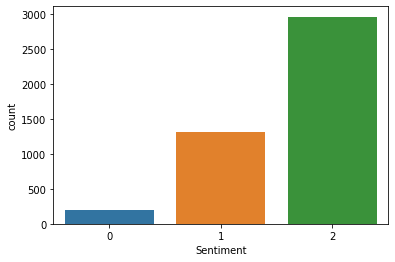

In [49]:
sns.countplot(x ='Sentiment', data = df_UP_SP)

In [50]:
def get_range(date):
  if (date > '2022-01-01') and (date <= '2022-01-05'):
    return '1Jan-5Jan'
  elif (date > '2022-01-06') and (date <= '2022-01-10'):
    return '6Jan-10Jan'
  else:
    return '11Jan-15Jan'

In [51]:
df_UP_SP['Range'] = df_UP_SP['Date'].apply(get_range)

In [52]:
df_UP_SP

,Tweet,Sentiment,Date,Range
0,bjp get 325+ seats. haven’t seen mood people u...,2,2022-01-14 22:05:47+00:00,11Jan-15Jan
1,kerala look like woman r going get justice! co...,2,2022-01-14 20:57:44+00:00,11Jan-15Jan
2,24% swing 17 untrue . bjp 42% 14 2 % loss 14 e...,0,2022-01-14 20:54:50+00:00,11Jan-15Jan
3,exodus can’t decide bjp’s position upcoming el...,0,2022-01-14 20:10:11+00:00,11Jan-15Jan
4,bjp win sanghamitra maurya act like bridge bri...,2,2022-01-14 19:22:00+00:00,11Jan-15Jan
...,...,...,...,...
4459,sp president make first poll promise 2022 asse...,2,2022-01-01 07:56:26+00:00,1Jan-5Jan
4460,sp+inc make govt mark word,2,2022-01-01 05:09:34+00:00,1Jan-5Jan
4461,sp atleast?,1,2022-01-01 02:30:50+00:00,1Jan-5Jan
4462,uttar pradesh news sp rld worker engaged fistf...,1,2022-01-03 08:39:30+00:00,1Jan-5Jan


In [53]:
def clean_date(date):
  date = date.replace(date[11:], "")
  return date

In [54]:
df_UP_SP['Date'] = df_UP_SP['Date'].apply(clean_date)

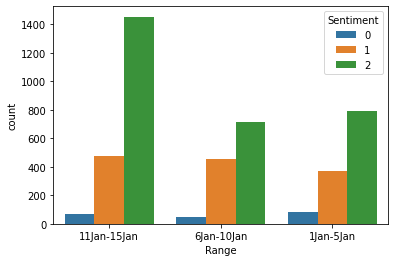

In [55]:
sns.countplot(x ='Range', data = df_UP_SP, hue='Sentiment')

In [56]:
df_UP_SP['Sentiment'].value_counts()

2    2958
1    1307
0     199
Name: Sentiment, dtype: int64

In [59]:
df_UP_SP['count'] = 1

In [60]:
df_sum = df_UP_SP.groupby(['Range', 'Sentiment']).sum()

In [61]:
df_sum

count
Range       Sentiment       
11Jan-15Jan 0             67
            1            479
            2           1454
1Jan-5Jan   0             81
            1            371
            2            792
6Jan-10Jan  0             51
            1            457
            2            712

In [62]:
df_sum2 = df_UP_SP.groupby(['Date', 'Sentiment']).sum()

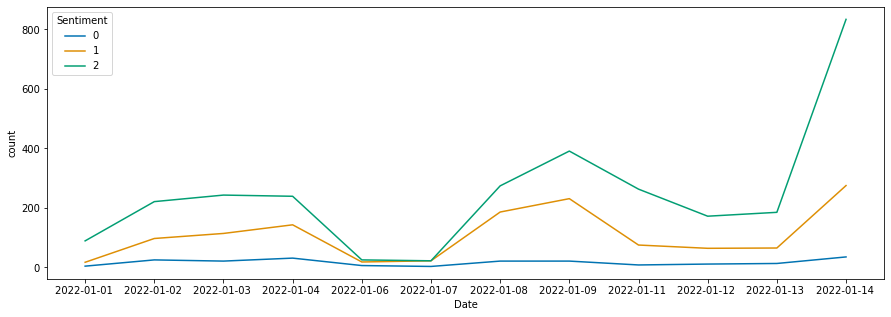

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot( x = "Date",
             y = "count",
             data = df_sum2, hue="Sentiment", ax=ax, palette='colorblind')
plt.show()

In [87]:
df_test = pd.read_csv('1Jan_to_5Jan/UP-Congress')
df_test2 = pd.read_csv('6Jan_to_10Jan/UP-Congress.csv')
df_test3 = pd.read_csv('11Jan_to_15Jan/UP-Congress.csv')

In [88]:
df_test = pd.concat([df_test2, df_test],axis=0,ignore_index=True)
df_test = pd.concat([df_test3, df_test],axis=0,ignore_index=True)

In [89]:
df_test.drop_duplicates(subset ="Text",
                     keep = 'first', inplace = True)

In [90]:
len(df_test)

6352

In [91]:
df_test['Text'].loc[1]

'Kick him out of CONGRESS and lock him up! He is guilty of participating and encouraging this VIOLENT ATTACK on the CAPITOL! Clearly he was ON BOARD with overturning the election results AND then pushing the BIG LIE. https://t.co/LHFTFU0PVU'

In [92]:
df_test['cleaned_tweet']=df_test['Text'].apply(dataCleaning)

In [93]:
df_test['cleaned_tweet'].loc[1]

'kick congress lock up! guilty participating encouraging violent attack capitol! clearly board overturning election result pushing big lie.'

In [94]:
df_test2 = df_test.copy()

In [95]:
df_test.drop(columns =['Datetime', 'Text', 'User'], axis=1, inplace=True)

In [96]:
df_test.head()
df_test.dropna(subset=['cleaned_tweet'], inplace=True)
len(df_test)

6352

In [97]:
df_test['cleaned_tweet'].isnull().sum()

0

In [102]:
total_data = pd.concat([actual_df_Vader, df_test],axis=0,ignore_index=True)
total_data

,cleaned_tweet,Sentiment
0,aap's historic win chandigarh mc poll show peo...,2.0
1,ahead election bjp planning massive campaign r...,1.0
2,cpi(m) general secretary sitaram yechury said ...,0.0
3,. top brass up: pm pitch party upcoming assemb...,2.0
4,bjp register bigger win time assembly poll cla...,2.0
...,...,...
17645,"heaven governance. 2012: ""even god can’t stop ...",NaN
17646,time opinion poll uttar pradesh bjp+ : 239 sp+...,NaN
17647,time now-veto opinion poll uttar pradesh : 403...,NaN
17648,time - veto opinion poll western uttar pradesh...,NaN


In [103]:
total_data['cleaned_tweet'].isnull().sum()

0

In [104]:
total_data.dropna(subset=['cleaned_tweet'], inplace=True)

In [105]:
cv = CountVectorizer()
vec = cv.fit_transform(total_data['cleaned_tweet'])
print(vec.shape, total_data.shape)

(17650, 23508) (17650, 2)


In [106]:
X=vec[:len(actual_df_Vader)]
y=actual_df_Vader.Sentiment
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85)

In [107]:
rf_with_cv = RandomForestClassifier(n_estimators=65)
rf_with_cv.fit(X_train,y_train)
pred = rf_with_cv.predict(X_test)
accuracy_score(pred,y_test)

0.7929203539823009

In [108]:
test_vec = vec[len(actual_df_Vader):]
test_vec

<6352x23508 sparse matrix of type '<class 'numpy.int64'>'
	with 88670 stored elements in Compressed Sparse Row format>

In [109]:
predictions = rf_with_cv.predict(test_vec)
predictions

array([1, 0, 2, ..., 1, 2, 1])

In [110]:
len(predictions)

6352

In [111]:
submission = pd.DataFrame()
submission['Tweet'] = df_test['cleaned_tweet']
submission['Sentiment'] = predictions
submission['Date'] = df_test2['Datetime']
submission

,Tweet,Sentiment,Date
0,meanwhile last congress election. aoc primarie...,1,2022-01-14 23:01:29+00:00
1,kick congress lock up! guilty participating en...,0,2022-01-14 22:36:12+00:00
2,republican congress still putting trump candid...,2,2022-01-14 22:16:39+00:00
3,they'll claim state control election process c...,0,2022-01-14 22:13:39+00:00
4,impact final vote. yet republican state trying...,0,2022-01-14 22:13:19+00:00
...,...,...,...
6787,"heaven governance. 2012: ""even god can’t stop ...",0,2022-01-02 06:33:51+00:00
6788,time opinion poll uttar pradesh bjp+ : 239 sp+...,2,2022-01-02 05:49:31+00:00
6792,time now-veto opinion poll uttar pradesh : 403...,1,2022-01-01 14:42:49+00:00
6793,time - veto opinion poll western uttar pradesh...,2,2022-01-01 14:25:24+00:00


In [112]:
submission.to_csv('UP-INC_prediction.csv', index=False)

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df_UP_INC = pd.read_csv('UP-INC_prediction.csv')

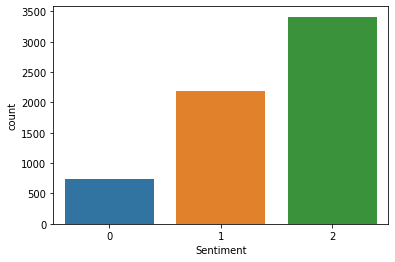

In [116]:
sns.countplot(x ='Sentiment', data = df_UP_INC)

In [117]:
def get_range(date):
  if (date > '2022-01-01') and (date <= '2022-01-05'):
    return '1Jan-5Jan'
  elif (date > '2022-01-06') and (date <= '2022-01-10'):
    return '6Jan-10Jan'
  else:
    return '11Jan-15Jan'

In [118]:
df_UP_INC['Range'] = df_UP_INC['Date'].apply(get_range)

In [119]:
df_UP_INC

,Tweet,Sentiment,Date,Range
0,meanwhile last congress election. aoc primarie...,1,2022-01-14 23:01:29+00:00,11Jan-15Jan
1,kick congress lock up! guilty participating en...,0,2022-01-14 22:36:12+00:00,11Jan-15Jan
2,republican congress still putting trump candid...,2,2022-01-14 22:16:39+00:00,11Jan-15Jan
3,they'll claim state control election process c...,0,2022-01-14 22:13:39+00:00,11Jan-15Jan
4,impact final vote. yet republican state trying...,0,2022-01-14 22:13:19+00:00,11Jan-15Jan
...,...,...,...,...
6347,"heaven governance. 2012: ""even god can’t stop ...",0,2022-01-02 06:33:51+00:00,1Jan-5Jan
6348,time opinion poll uttar pradesh bjp+ : 239 sp+...,2,2022-01-02 05:49:31+00:00,1Jan-5Jan
6349,time now-veto opinion poll uttar pradesh : 403...,1,2022-01-01 14:42:49+00:00,1Jan-5Jan
6350,time - veto opinion poll western uttar pradesh...,2,2022-01-01 14:25:24+00:00,1Jan-5Jan


In [120]:
def clean_date(date):
  date = date.replace(date[11:], "")
  return date

In [121]:
df_UP_INC['Date'] = df_UP_INC['Date'].apply(clean_date)

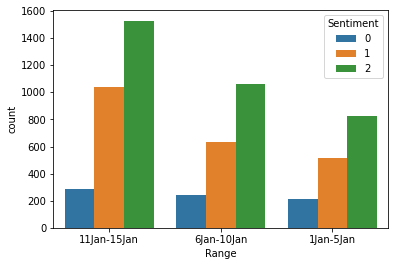

In [122]:
sns.countplot(x ='Range', data = df_UP_INC, hue='Sentiment')

In [123]:
df_UP_INC['Sentiment'].value_counts()

2    3412
1    2194
0     746
Name: Sentiment, dtype: int64

In [124]:
df_UP_INC['count'] = 1

In [125]:
df_sum2 = df_UP_INC.groupby(['Date', 'Sentiment']).sum()

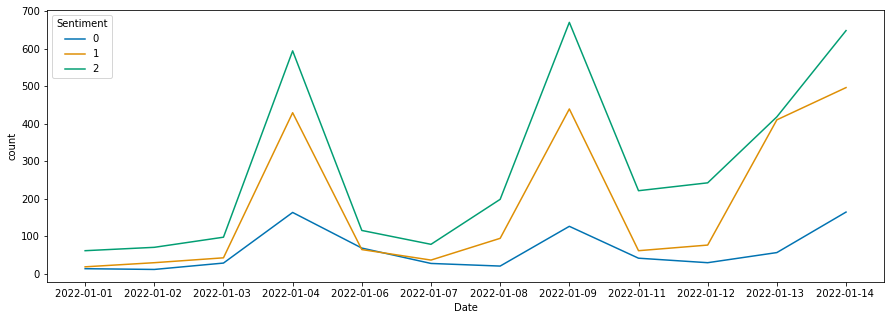

In [126]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot( x = "Date",
             y = "count",
             data = df_sum2, hue="Sentiment", ax=ax, palette='colorblind')
plt.show() 